In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from highlight_text import fig_text, ax_text
# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch, FontManager, Pitch
import json

URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)

In [46]:
pitch = Pitch(pitch_type='opta')
pitch.dim

FixedDims(pitch_width=68.0, pitch_length=105.0, goal_width=9.6, goal_length=1.9, six_yard_width=26.4, six_yard_length=5.8, penalty_area_width=57.8, penalty_area_length=17.0, circle_diameter=17.68, corner_diameter=1.94, arc=None, invert_y=False, origin_center=False, left=0.0, right=100.0, bottom=0.0, top=100.0, aspect=0.6476190476190476, width=100.0, length=100.0, goal_bottom=45.2, goal_top=54.8, six_yard_left=5.8, six_yard_right=94.2, six_yard_bottom=36.8, six_yard_top=63.2, penalty_left=11.5, penalty_right=88.5, penalty_area_left=17.0, penalty_area_right=83.0, penalty_area_bottom=21.1, penalty_area_top=78.9, center_width=50.0, center_length=50.0, x_markings_sorted=array([  0. ,   5.8,  11.5,  17. ,  50. ,  83. ,  88.5,  94.2, 100. ]), y_markings_sorted=array([  0. ,  21.1,  36.8,  45.2,  54.8,  63.2,  78.9, 100. ]), pitch_extent=array([  0., 100.,   0., 100.]), positional_x=array([  0. ,  17. ,  33.5,  50. ,  66.5,  83. , 100. ]), positional_y=array([  0. ,  21.1,  36.8,  63.2,  78.9,

In [47]:
pitch.dim.positional_x

array([  0. ,  17. ,  33.5,  50. ,  66.5,  83. , 100. ])

In [48]:
pitch.dim.positional_y

array([  0. ,  21.1,  36.8,  63.2,  78.9, 100. ])

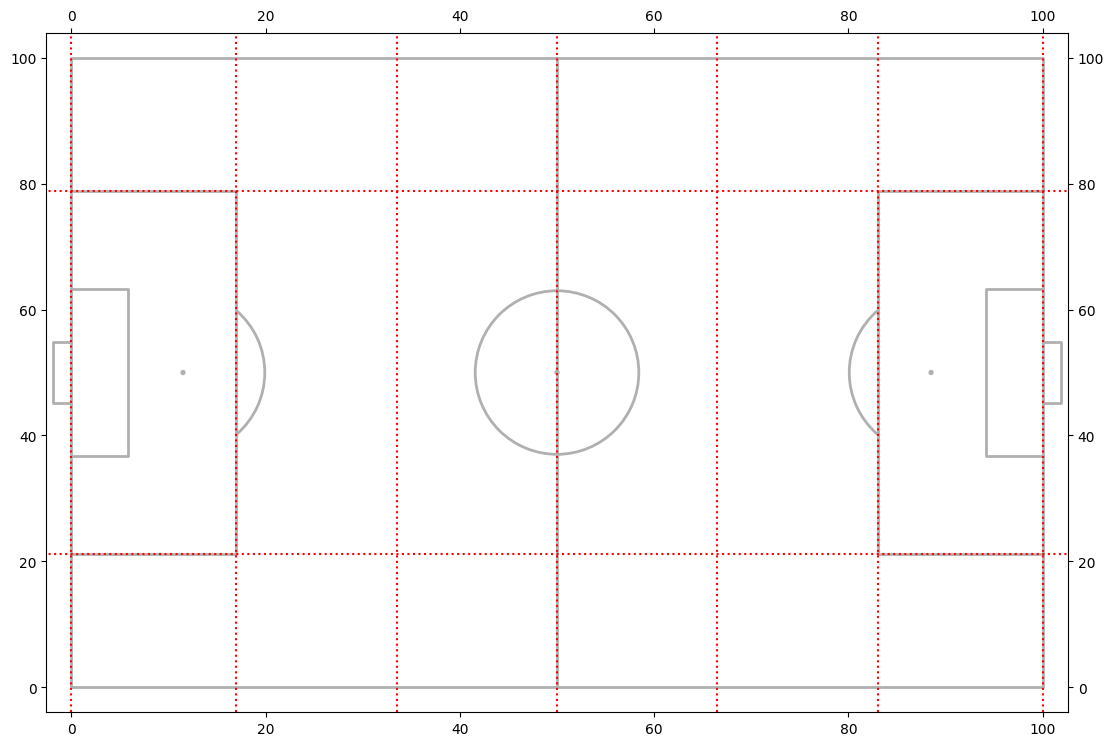

In [53]:
fig = plt.figure(figsize = (16,9), dpi = 100)
ax = plt.subplot(111)
pitch = Pitch(
    pitch_type='opta',
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

for coordenate in pitch.dim.positional_x:
    ax.plot([coordenate, coordenate], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')

for coordenate in [21.1,78.9]:
    ax.plot([ax.get_ylim()[0], ax.get_ylim()[1]], [coordenate, coordenate], ls=':', color='red')


#ax.plot([17, 17], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
#ax.plot([33.5,33.5], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
#ax.plot([50,50], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
#ax.plot([66.6,66.6], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
#ax.plot([83,83], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
#
#
#
##
#ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [21.1,21.1], ls=':', color='red')
#ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [63.2,63.2], ls=':', color='red')
#ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [70,70], ls=':', color='red')

In [37]:
zone_areas = {
    'zone_1':{
        'x_lower_bound': 0, 'x_upper_bound': 17,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_2':{
        'x_lower_bound': 0, 'x_upper_bound': 17,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_3':{
        'x_lower_bound': 0, 'x_upper_bound': 17,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'zone_4':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_5':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_6':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'zone_7':{
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_8':{
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_9':{
        'x_lower_bound': 33.5, 'x_upper_bound': 50,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'zone_10':{
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_11':{
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_12':{
        'x_lower_bound': 50, 'x_upper_bound': 66.5,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'zone_13':{
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_14':{
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_15':{
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'zone_16':{
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_17':{
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_18':{
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    }
}

In [38]:
def assign_shot_zone(x,y):
    '''
    This function returns the zone based on the x & y coordinates of the shot
    taken.
    Args:
        - x (float): the x position of the shot based on a vertical grid.
        - y (float): the y position of the shot based on a vertical grid.
    '''

    global zone_areas

    # Conditions

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone

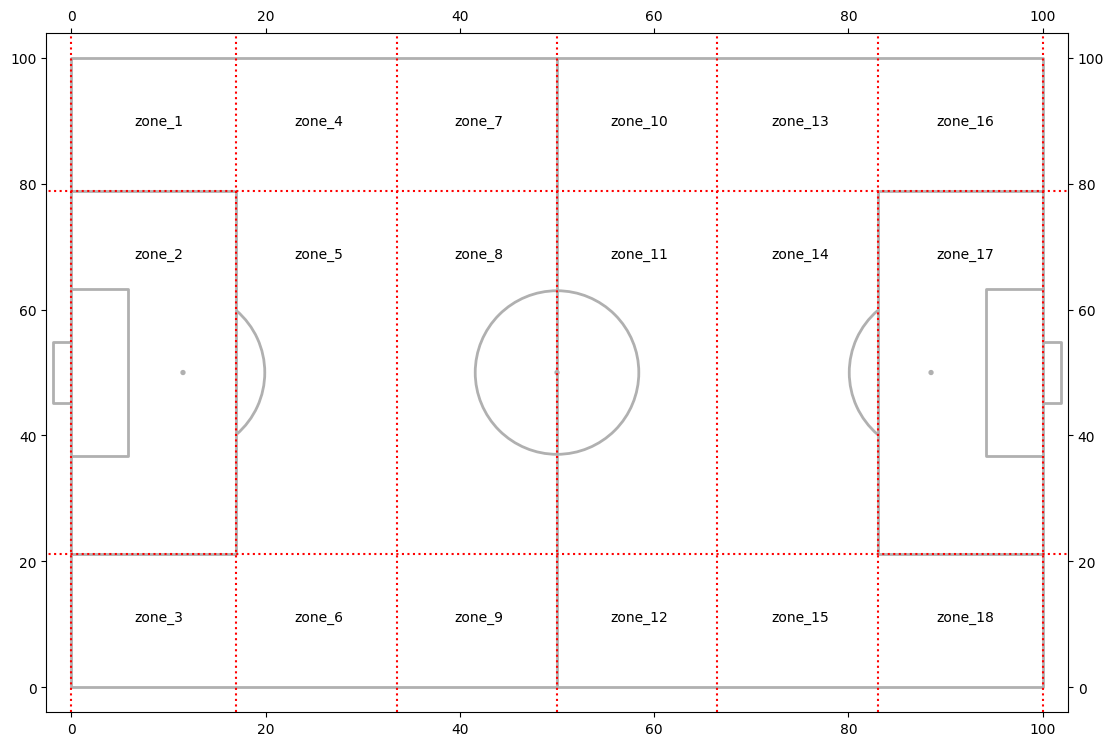

In [54]:
fig = plt.figure(figsize = (16,9), dpi = 100)
ax = plt.subplot(111)
pitch = Pitch(
    pitch_type='opta',
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

for zone in zone_areas.keys():
    ax.text(x=zone_areas[zone]['x_upper_bound'] - 8, 
            y=zone_areas[zone]['y_upper_bound'] - 10,
            s=zone, ha='center',va='center')

for coordenate in pitch.dim.positional_x:
    ax.plot([coordenate, coordenate], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')

for coordenate in [21.1,78.9]:
    ax.plot([ax.get_ylim()[0], ax.get_ylim()[1]], [coordenate, coordenate], ls=':', color='red')
